In [15]:
dataset = r'E:\Content\Data Science\Training Content\@Projects\Datasets\Flickr8k_Dataset\Flicker8k_Dataset'
data_tokens = r'E:\Content\Data Science\Training Content\@Projects\Datasets\Flickr8k_text\Flickr8k.token.txt'

In [16]:
from keras.layers import Dense, Flatten, Convolution2D, Dropout, LSTM, Bidirectional, TimeDistributed, Embedding, Activation, Concatenate
import numpy as np
import pandas as pd
from keras.models import Sequential, Model, load_model
import IPython.display as ipd

In [38]:
import os

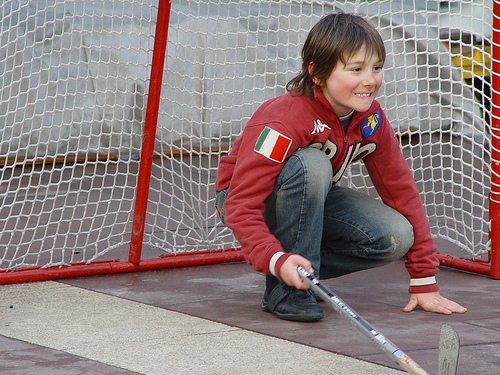

In [17]:
ipd.Image('\\'.join([dataset,'103106960_e8a41d64f8.jpg']))

In [48]:
f = open(data_tokens)
captions = f.read()
f.close()

In [24]:
from string import punctuation as punc

In [32]:
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
captions = {c.split('\t')[0].split('.')[0]: 'beginword '+' '.join(''.join([i for i in c.split('\t')[-1].lower() if i not in punc]).split()).strip() + ' endword' for c in captions.split('\n')[:-1]}

In [36]:
captions

{'1000268201_693b08cb0e': 'beginword a little girl in a pink dress going into a wooden cabin endword',
 '1001773457_577c3a7d70': 'beginword two dogs on pavement moving toward each other endword',
 '1002674143_1b742ab4b8': 'beginword young girl with pigtails painting outside in the grass endword',
 '1003163366_44323f5815': 'beginword man laying on bench holding leash of dog sitting on ground endword',
 '1007129816_e794419615': 'beginword the man with pierced ears is wearing glasses and an orange hat endword',
 '1007320043_627395c3d8': 'beginword the small child climbs on a red ropes on a playground endword',
 '1009434119_febe49276a': 'beginword a dog runs on the green grass near a wooden fence endword',
 '1012212859_01547e3f17': 'beginword white dog with brown ears standing near water with head turned to one side endword',
 '1015118661_980735411b': 'beginword smiling boy in white shirt and blue jeans in front of rock wall with man in overalls behind him endword',
 '1015584366_dfcec3c85a

In [50]:
len(captions)

8092

In [37]:
captions.get('103106960_e8a41d64f8')

'beginword hockey goalie boy in red jacket crouches by goal with stick endword'

In [39]:
for file in os.listdir(dataset):
    print(file)
    break

1000268201_693b08cb0e.jpg


In [40]:
title_images = [file.split('.')[0] for file in os.listdir(dataset) if file.split('.')[0] in captions]

In [42]:
len(title_images)

8091

In [51]:
cap = set(captions.keys())
tile = set(title_images)

In [52]:
cap.difference(tile)

{'2258277193_586949ec62'}

In [53]:
del captions['2258277193_586949ec62']

In [55]:
training_set = title_images[:8081].copy()
test_set = title_images[8081:].copy()

In [56]:
from keras.applications.resnet50 import ResNet50

In [60]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

In [66]:
from numpy import expand_dims

In [71]:
import matplotlib.pyplot as plt

In [ ]:
from keras.optimizers import Adam

In [78]:
def train(path, xtrain):
    model = ResNet50(include_top=False, input_shape=(224,224,3),pooling='avg')
    #print(model.summary())
    features = {}
    for file in xtrain:
        fname = '\\'.join([path,file+'.jpg'])
        image = load_img(fname, target_size=(224,224))
        image = img_to_array(image)
        image = expand_dims(image,0)
        image = preprocess_input(image)
        feature = model.predict(image)
        features[file] = feature
    return features

In [ ]:
training_features = train(dataset,training_set)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


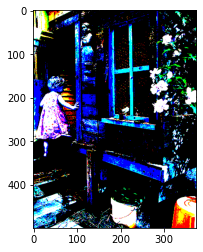

In [73]:
plt.imshow(img[0])

In [ ]:
model_img = Sequential()
model_img.add(Dense(units=128, input_shape=(2048,), activation='relu'))
model_img.add(Dropout(0.4))
model_img.add(RepeatVector(...)) # the highest number of times we want to repeat the input
model_img.summary()

In [ ]:
model_nlp = Sequential()
model_nlp.add(Embedding(input_dim=..., output_dim=128, input_length=...))
model_nlp.add(LSTM(256, return_sequences=True))
model_nlp.add(Dropout(0.4))
model_nlp.add(TimeDistributed(Dense(128)))
model_nlp.summary()

In [ ]:
# Final Model
combined = Concatenate()([model_img.output, model_nlp.output])
x = LSTM(128, dropout=0.4, return_sequences=True, recurrent_dropout=0.4)(combined)
x = LSTM(512, dropout=0.4, return_sequences=False, recurrent_dropout=0.4)(x)
x = Dense(...)(x)
out = Activation('softmax')(x)

model_final = Model(inputs = [model_img.input, model_nlp.input], outputs = out)

optimizer = Adam(learning_rate=0.0001)
model_final.compile(loss='categorical_crossentropy', optimizer=optimizer)
model_final.summary()

In [ ]:
history = model_final.fit([],labels, epochs=100, batch_size=512, validation_data=([],))

In [ ]:
model_final.save('icg_model.h5')